In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\prady\Downloads\Google_stock_price.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,3/27/2014 16:00:00,28.32,28.32,27.57,27.85,13052
1,3/28/2014 16:00:00,27.99,28.24,27.86,27.92,41003
2,3/31/2014 16:00:00,28.27,28.27,27.77,27.77,10772
3,4/1/2014 16:00:00,27.86,28.34,27.86,28.28,7932
4,4/2/2014 16:00:00,28.96,30.16,28.03,28.27,146697


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1957 non-null   object 
 1   Open    1957 non-null   float64
 2   High    1957 non-null   float64
 3   Low     1957 non-null   float64
 4   Close   1957 non-null   float64
 5   Volume  1957 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 91.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,1957.000000,1957.000000,1957.000000,1957.000000,1.957000e+03
mean,57.810925,58.356413,57.286576,57.844154,1.691049e+06
std,30.773979,31.065762,30.518720,30.807773,8.385191e+05
min,24.660000,24.730000,24.310000,24.560000,7.932000e+03
25%,36.140000,36.410000,35.830000,36.060000,1.198234e+06
50%,52.130000,52.740000,51.420000,52.000000,1.481688e+06
75%,65.490000,66.290000,65.240000,65.770000,1.938658e+06
max,151.000000,151.850000,149.890000,150.710000,1.116494e+07


In [6]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

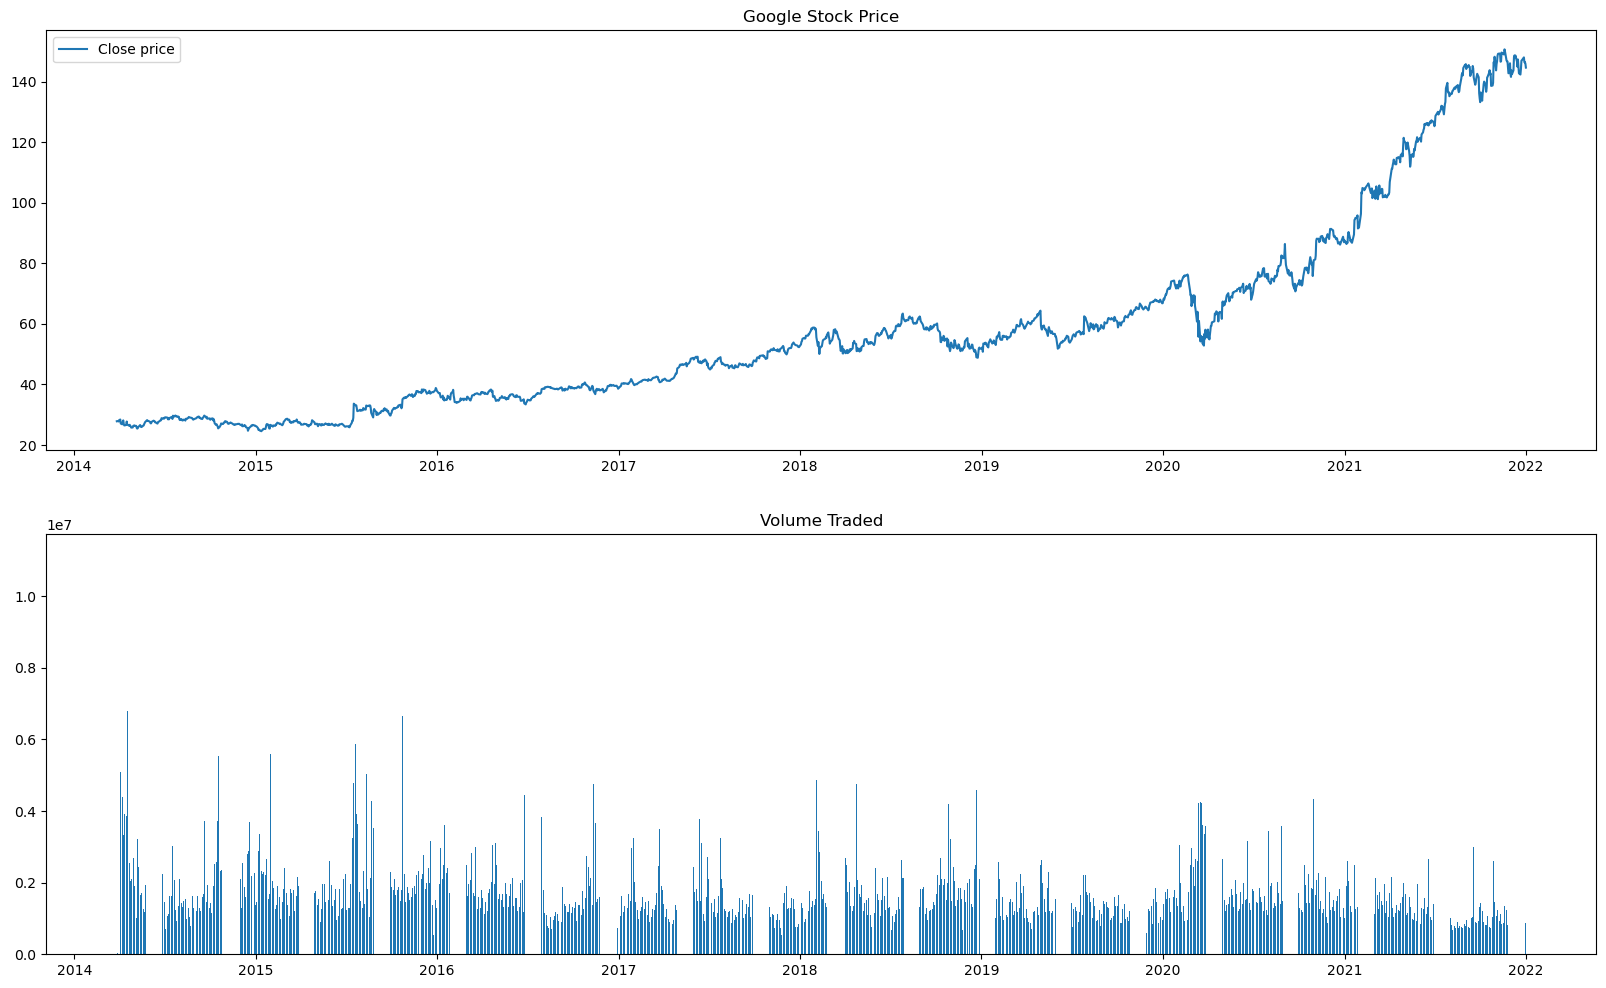

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Google Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model:-


In [8]:
data = list(df2["Close"])

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  2.0149104180663957
2. P-Value :  0.9986920152065939
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression: 1936
5. Critical Values :
	 1% :  -3.433732227090619
	 5% :  -2.863034058711895
	 10% :  -2.5675653775463596


In [12]:
pip install pmdarima


     -------------------------------------- 569.7/569.7 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 2.0 MB/s eta 0:00:00


In [13]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [14]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [15]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1857 100


In [16]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=6.51 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7206.577, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=6514.386, Time=0.27 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.96 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=6316.192, Time=0.31 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=6186.452, Time=0.47 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=6121.154, Time=0.53 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=6067.089, Time=0.75 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.12 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.44 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=6069.087, Time=1.25 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 16.834 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1957
Model:         

In [17]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [18]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1957
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -3027.545
Date:                Thu, 20 Jul 2023   AIC                           6067.089
Time:                        15:09:06   BIC                           6100.558
Sample:                             0   HQIC                          6079.392
                               - 1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8750      0.014    -61.311      0.000      -0.903      -0.847
ar.L2         -0.6540      0.020    -33.208      0.000      -0.693      -0.615
ar.L3         -0.5005      0.021    -24.323      0.000      -0.541      -0.460
ar.L4         -0.3259      0.017    -18.699      0.000      -0.360      -0.292
ar.L5         -0.1682      0.014    -12.390      0.000      -0.195      -0.142
sigma2         1.2954      0.020     64.861      0.000       1.256       1.335
===================================================================================
Ljung-Box (L1) (Q):                   3.50   Jarque-Bera (JB):              3844.18
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):              10.55   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([138.50822385, 137.92721534, 138.73854382, 138.69002615,
       139.20126942, 137.28767893, 136.24391014, 136.75230048,
       138.39537755, 141.52562164, 143.05711591, 143.91236854,
       143.10023042, 145.65843113, 146.74314923, 146.1956905 ,
       146.41216511, 144.50437391, 145.10222016, 145.70703949,
       144.82510856, 144.79193316, 141.39980954, 143.10652113,
       143.31487092, 145.03487723, 144.45760795, 140.91821634,
       138.50817295, 138.8698733 , 140.52820739, 141.29691667,
       142.36041047, 141.58647763, 135.85297705, 133.45997014,
       132.00879485, 135.35523688, 132.61688735, 135.00054541,
       137.69710814, 139.87189776, 141.28795488, 139.30551418,
       137.22131356, 138.02874446, 142.01867652, 142.25429127,
       143.38507359, 144.69234394, 143.43264009, 143.50376707,
       138.37349854, 138.03190854, 139.16293411, 146.59227492,
       147.15536648, 148.99011718, 144.98004207, 146.62032692,
       148.14041521, 148.94438701, 149.88529034, 149.51

In [20]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2021-08-11 16:00:00    138.508224
2021-08-12 16:00:00    137.927215
2021-08-13 16:00:00    138.738544
2021-08-16 16:00:00    138.690026
2021-08-17 16:00:00    139.201269
                          ...    
2021-12-27 16:00:00    147.229551
2021-12-28 16:00:00    148.547539
2021-12-29 16:00:00    147.177680
2021-12-30 16:00:00    147.061465
2021-12-31 16:00:00    146.351052
Length: 100, dtype: float64

<Axes: xlabel='Date'>

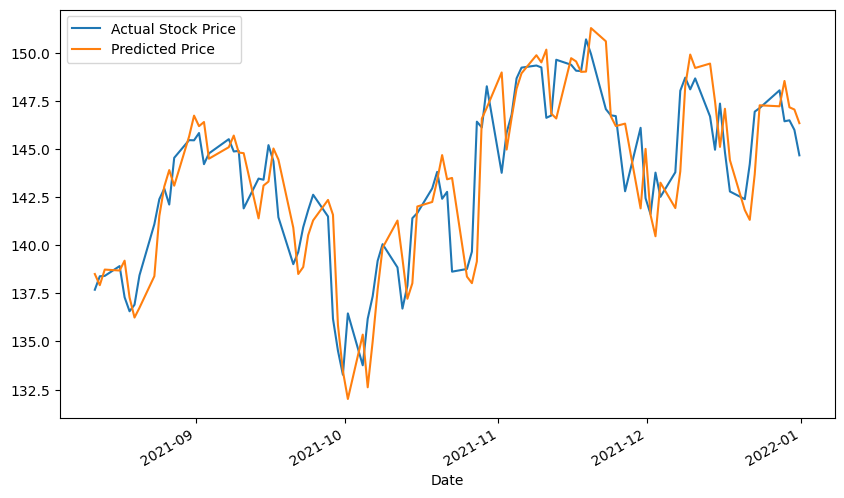

In [21]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

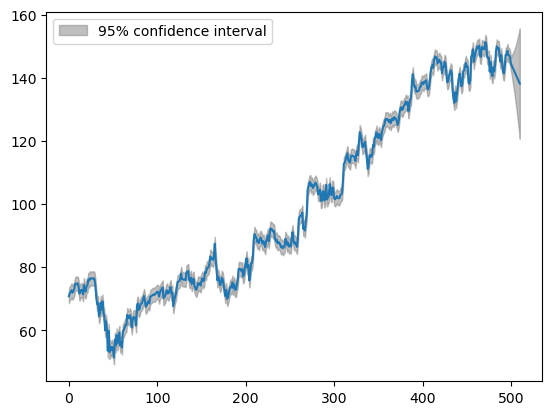

In [22]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [23]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

2.12360204247212

In [24]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.735311878669302

# Predicting Future 10 values:

In [25]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([146.35105213, 144.3082854 , 143.80271434, 143.10460195,
       142.54768342, 141.88894584, 141.20748369, 140.62709564,
       140.01044138, 139.38023627, 138.75955148])

In [26]:
import datetime
start_date = datetime.datetime(2021,12,31)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [27]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2021-12-31    146.351052
2022-01-01    144.308285
2022-01-02    143.802714
2022-01-03    143.104602
2022-01-04    142.547683
2022-01-05    141.888946
2022-01-06    141.207484
2022-01-07    140.627096
2022-01-08    140.010441
2022-01-09    139.380236
2022-01-10    138.759551
dtype: float64

<Axes: xlabel='Date'>

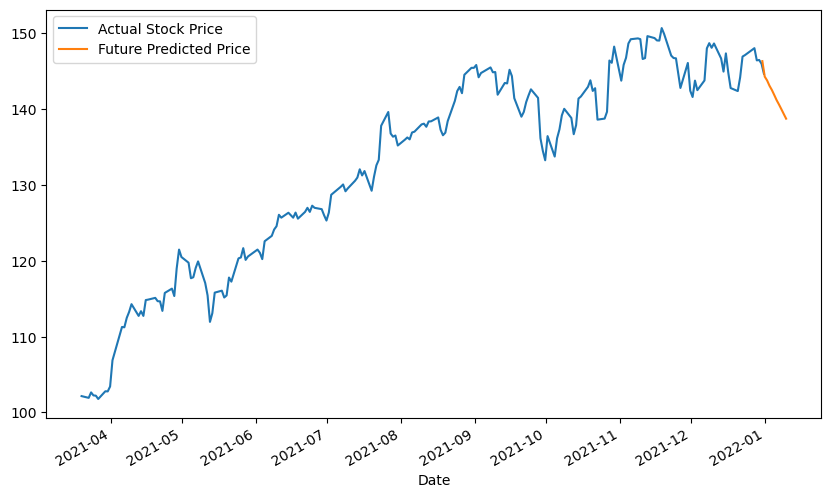

In [28]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

# Comparing predicted prices with real prices
 

In [30]:
check_df = pd.read_csv(r"C:\Users\prady\Downloads\Google_stock_price-future_values.csv")

In [31]:
check_df.Date= pd.to_datetime(check_df.Date)
check_df2 =check_df.set_index('Date')

In [32]:
check_df2

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03 16:00:00,144.48,145.55,143.50,145.07,1261225
2022-01-04 16:00:00,145.55,146.61,143.82,144.42,1146389
2022-01-05 16:00:00,144.18,144.30,137.52,137.65,2482076
2022-01-06 16:00:00,137.50,139.69,136.76,137.55,1452452
2022-01-07 16:00:00,137.91,138.25,135.79,137.00,970412
2022-01-10 16:00:00,135.10,138.64,133.14,138.57,1704784
2022-01-11 16:00:00,138.18,140.33,136.81,140.02,1175062


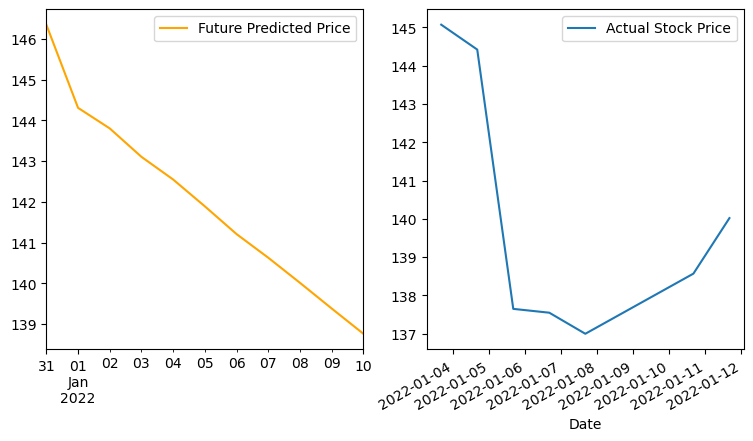

In [33]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 2, 2)
check_df2['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
type(pred_future2)

pandas.core.series.Series

In [44]:
# Ensure 'pred_future2' has the same length as 'check_df2['Close']'
pred_future2 = pred_future2[-len(check_df2['Close']):]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(check_df2['Close'], pred_future2)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(check_df2['Close'], pred_future2))
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 2.3955823188586254
Root Mean Squared Error (RMSE): 2.5690602622574352
